Comparison of eigenvalues for three types of models:
1. Heisenberg Chain
2. Heisenberg Honeycomb
3. Kitaev Honeycomb

We're going to compare all models for N=12 spins for periodic boundary condition in one dimension

# Heisenberg Chain

In [1]:
import netket as nk
from Hamiltonians import Kitaev
from Utils import draw_kitaev_honeycomb, plot_spectrum
from matplotlib import pyplot as plt

In [2]:
n_eval = 1000
J = 1
J_kitaev = (0.9, 0.05, 0.05)
J_gapless = (0.33, 0.33, 0.33)

In [3]:
chain = nk.graph.Hypercube(length=12, n_dim=1, pbc=True)
hi_chain = nk.hilbert.Spin(s=1/2, N=chain.n_nodes)
ha_chain = nk.operator.Heisenberg(hi_chain, graph=chain, J=J)
evals_chain = nk.exact.lanczos_ed(ha_chain, k=n_eval, compute_eigenvectors=False)

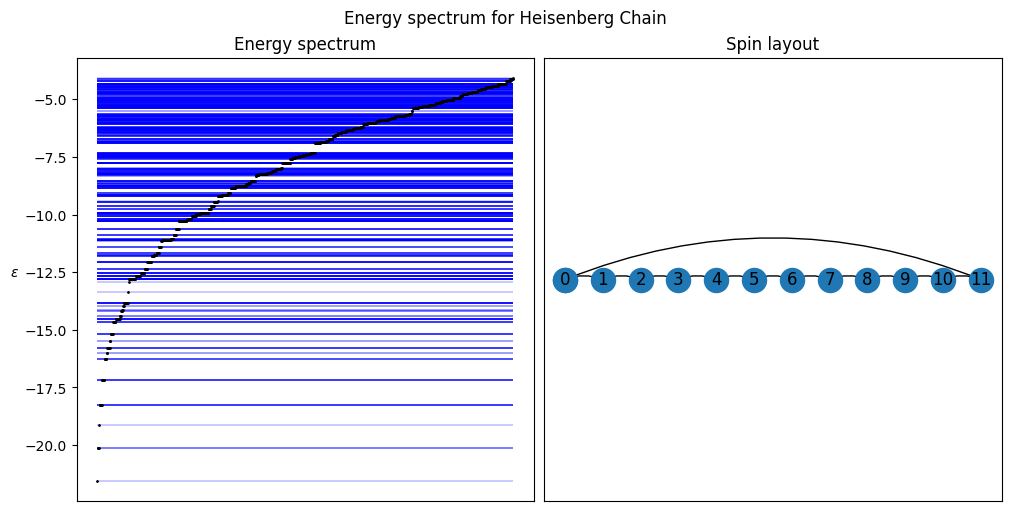

In [4]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
plot_spectrum(evals_chain, axes[0], title='Energy spectrum')
chain.draw(ax=axes[1])
axes[1].set(xticks=[], yticks=[], title='Spin layout')
figure.suptitle('Energy spectrum for Heisenberg Chain');

# Heisenberg Triangle

In [5]:
triangle = nk.graph.Triangular(extent=[4,3], pbc=[True, False])
hi_triangle = nk.hilbert.Spin(s=1/2, N=triangle.n_nodes)
ha_triangle = nk.operator.Heisenberg(hi_triangle, graph=triangle, J=J)
evals_triangle = nk.exact.lanczos_ed(ha_triangle, k=n_eval, compute_eigenvectors=False)

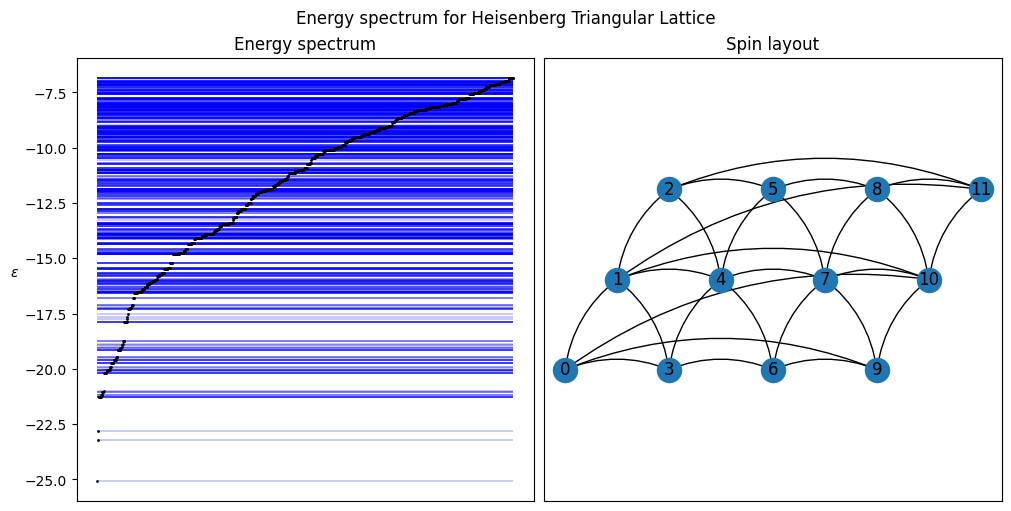

In [6]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
plot_spectrum(evals_triangle, axes[0], title='Energy spectrum')
triangle.draw(ax=axes[1])
axes[1].set(xticks=[], yticks=[], title='Spin layout')
figure.suptitle('Energy spectrum for Heisenberg Triangular Lattice');

# Heisenberg Honeycomb

In [7]:
honey = nk.graph.Honeycomb(extent=[2, 3], pbc=[False, True])
hi_honey = nk.hilbert.Spin(s=1/2, N=honey.n_nodes)
ha_honey = nk.operator.Heisenberg(hi_honey, graph=honey, J=J)
evals_honey = nk.exact.lanczos_ed(ha_honey, k=n_eval, compute_eigenvectors=False)

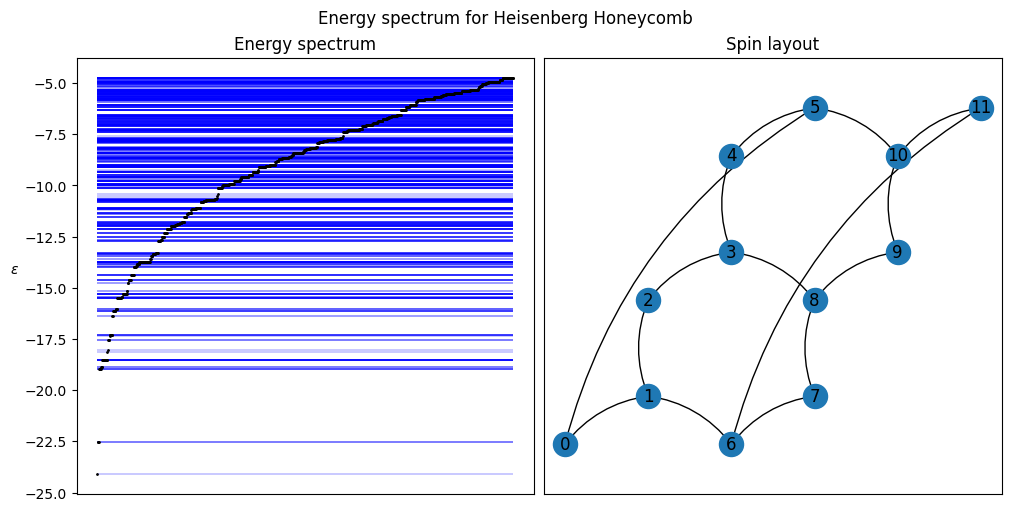

In [8]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
plot_spectrum(evals_honey, axes[0], title='Energy spectrum')
honey.draw(ax=axes[1])
axes[1].set(xticks=[], yticks=[], title='Spin layout')
figure.suptitle('Energy spectrum for Heisenberg Honeycomb');

# Kitaev Honeycomb

In [9]:
kitaev = nk.graph.KitaevHoneycomb(extent=[2, 3], pbc=[False, True])
hi_kitaev = nk.hilbert.Spin(s=1/2, N=kitaev.n_nodes)
ha_kitaev = Kitaev(hi_kitaev, kitaev=kitaev, J=J_kitaev)
evals_kitaev = nk.exact.lanczos_ed(ha_kitaev, k=n_eval, compute_eigenvectors=False)

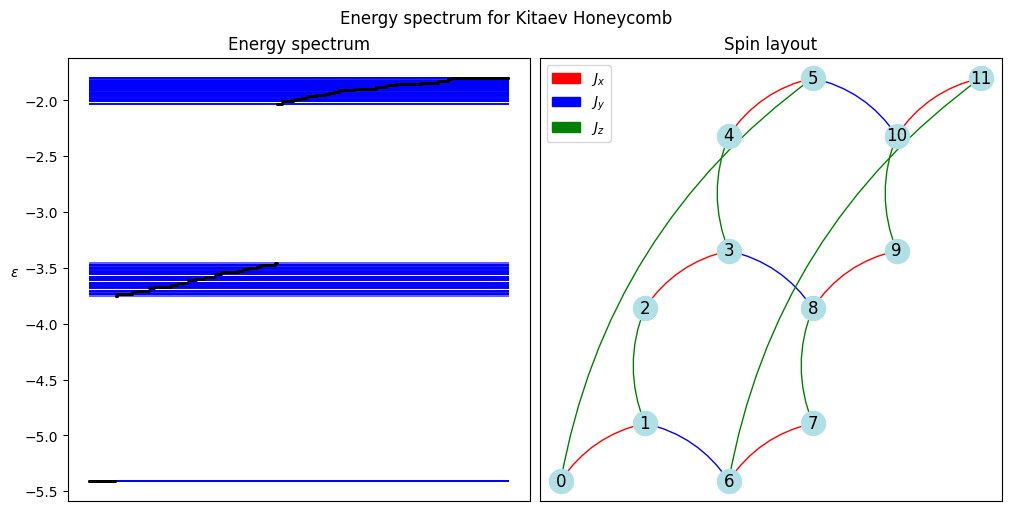

In [10]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
plot_spectrum(evals_kitaev, axes[0], title='Energy spectrum')
draw_kitaev_honeycomb(kitaev, ax=axes[1])
axes[1].set(xticks=[], yticks=[], title='Spin layout')
figure.suptitle('Energy spectrum for Kitaev Honeycomb');

# Gapless Kitaev Honeycomb

Kitaev model is gapless for similar values of $J_x$, $J_y$ and $J_z$

In [11]:
kitaev2 = nk.graph.KitaevHoneycomb(extent=[2, 3], pbc=[False, True])
hi_kitaev2 = nk.hilbert.Spin(s=1/2, N=kitaev2.n_nodes)
ha_kitaev2 = Kitaev(hi_kitaev2, kitaev=kitaev2, J=J_gapless)
evals_kitaev2 = nk.exact.lanczos_ed(ha_kitaev2, k=n_eval, compute_eigenvectors=False)

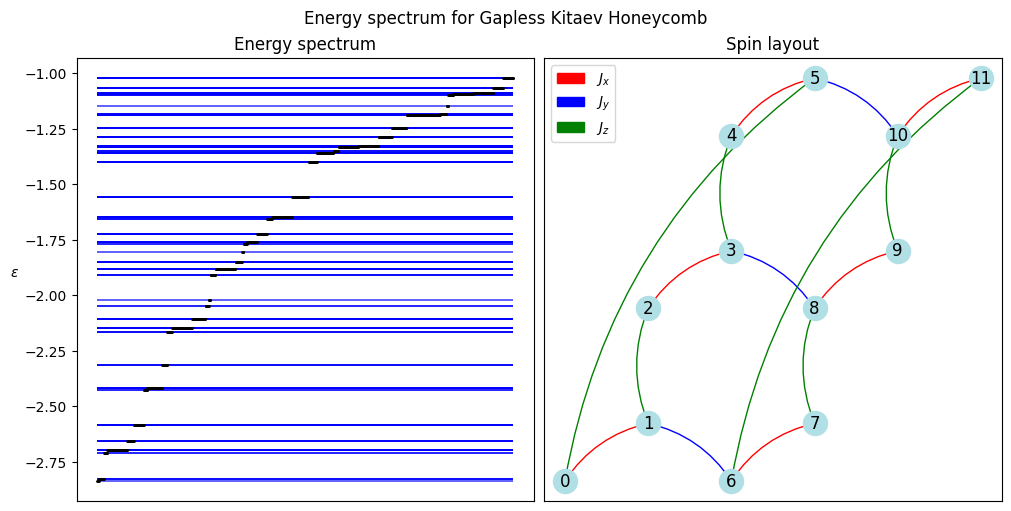

In [12]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
plot_spectrum(evals_kitaev2, axes[0], title='Energy spectrum')
draw_kitaev_honeycomb(kitaev2, ax=axes[1])
axes[1].set(xticks=[], yticks=[], title='Spin layout')
figure.suptitle('Energy spectrum for Gapless Kitaev Honeycomb');

# Kitaev-Heisenberg Honeycomb

This model contains anisotropic interactions from Kitaev model together with isotropic interaction from Heisenberg model

In [13]:
ha_kit_hei = ha_kitaev + ha_honey
evals_kit_hei = nk.exact.lanczos_ed(ha_kit_hei, k=n_eval, compute_eigenvectors=False)

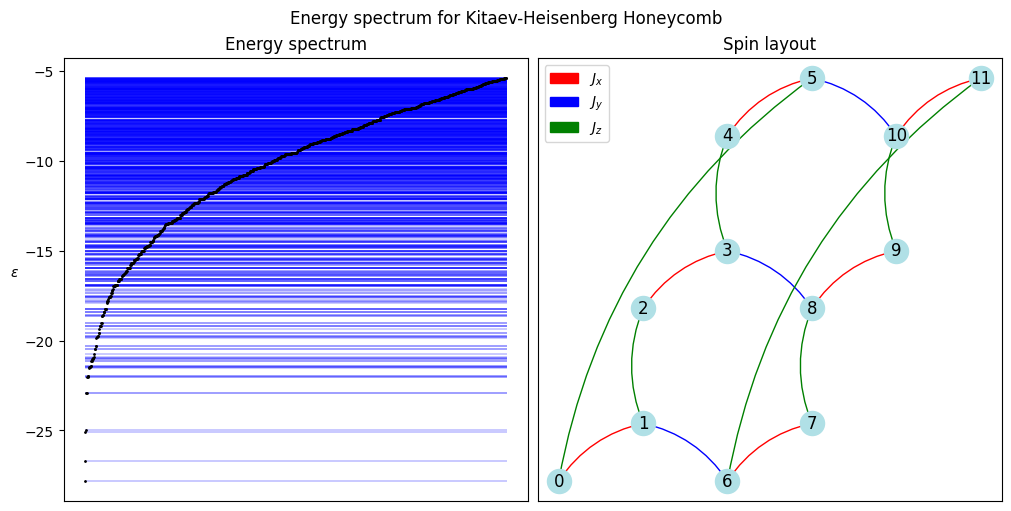

In [14]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
plot_spectrum(evals_kit_hei, axes[0], title='Energy spectrum')
draw_kitaev_honeycomb(kitaev2, ax=axes[1])
axes[1].set(xticks=[], yticks=[], title='Spin layout')
figure.suptitle('Energy spectrum for Kitaev-Heisenberg Honeycomb');

# Gapless Kitaev-Heisenberg Honeycomb

In [15]:
ha_kit_hei2 = ha_kitaev2 + ha_honey
evals_kit_hei2 = nk.exact.lanczos_ed(ha_kit_hei2, k=n_eval, compute_eigenvectors=False)

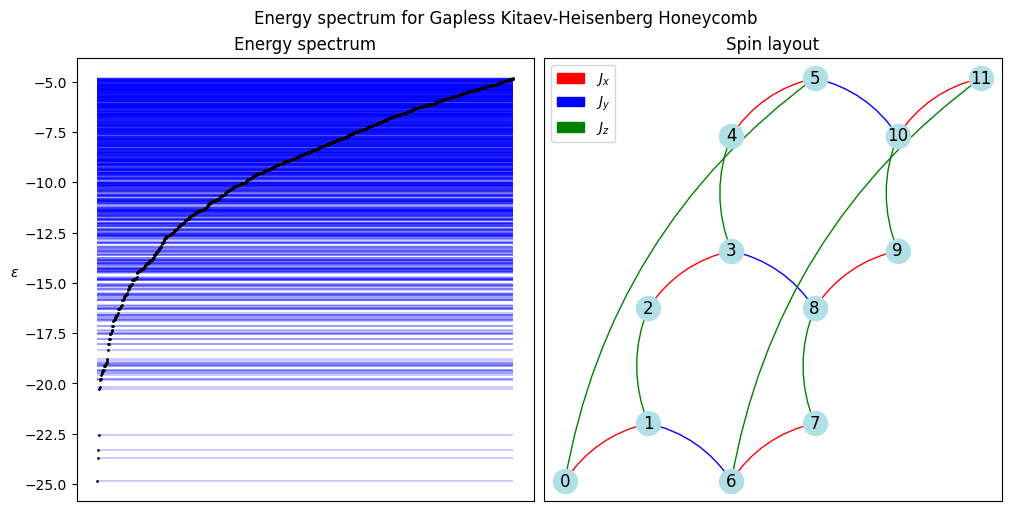

In [16]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
plot_spectrum(evals_kit_hei2, axes[0], title='Energy spectrum')
draw_kitaev_honeycomb(kitaev2, ax=axes[1])
axes[1].set(xticks=[], yticks=[], title='Spin layout')
figure.suptitle('Energy spectrum for Gapless Kitaev-Heisenberg Honeycomb');

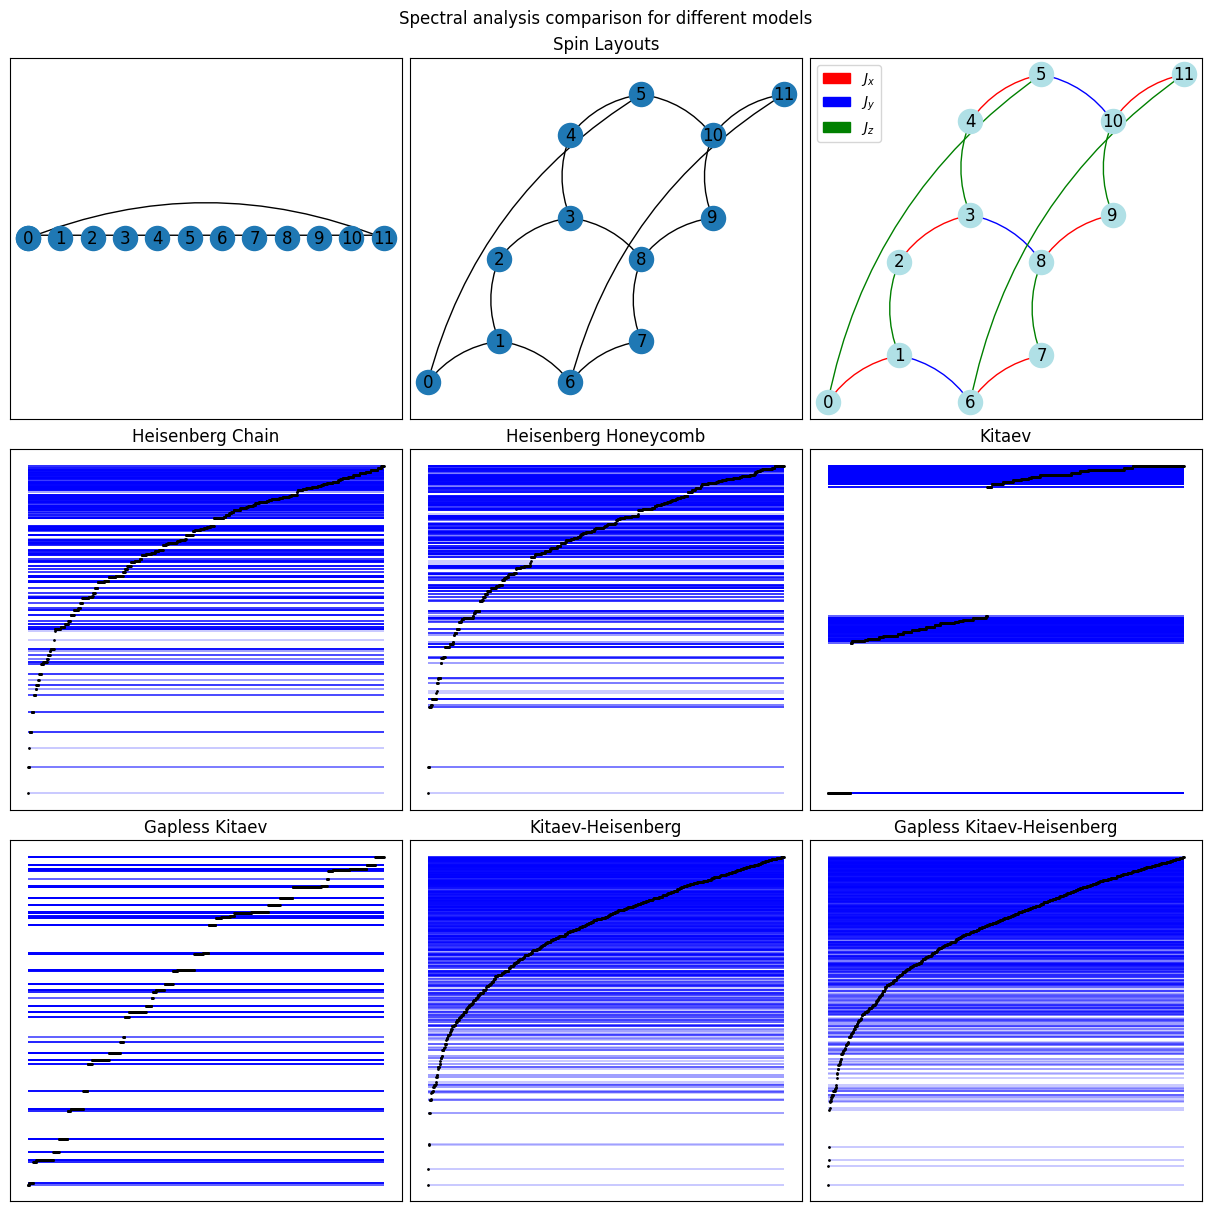

In [17]:
figure, axes = plt.subplots(3, 3, figsize=(12, 12), layout='constrained')
chain.draw(axes[0, 0])
axes[0, 0].set(xticks=[], yticks=[])
axes[0, 1].set(xticks=[], yticks=[])
honey.draw(axes[0, 1])
draw_kitaev_honeycomb(kitaev, ax=axes[0, 2])
spectrums = [evals_chain, evals_honey, evals_kitaev, 
             evals_kitaev2, evals_kit_hei, evals_kit_hei2]
titles = ['Heisenberg Chain', 'Heisenberg Honeycomb', 'Kitaev', 
          'Gapless Kitaev', 'Kitaev-Heisenberg', 'Gapless Kitaev-Heisenberg']
for i, spectrum, title in zip(range(3, 9), spectrums, titles):
    plot_spectrum(spectrum, figure.axes[i])
    figure.axes[i].set(xticks=[], yticks=[], ylabel=None, title=title)
axes[0, 1].set(title='Spin Layouts')
figure.suptitle('Spectral analysis comparison for different models');